In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ab7394a1f7c448b4baf155e4727a0999 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8KZuMu4FTuaI5gE8-s50bNbLofLvFy8CPorQJF6hDA8H',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ab7394a1f7c448b4baf155e4727a0999.get_object(Bucket='sell3-donotdelete-pr-zh6tzam3oecoga',Key='transavtions.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_excel(body)
dataset.head()


,days,quantity
0,1.03,999
1,1.06,1809
2,1.09,2800
3,1.12,3455
4,1.15,4222


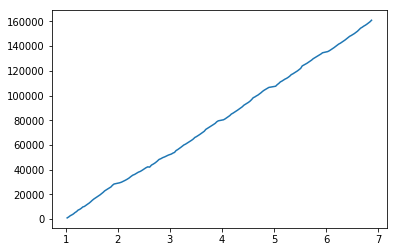

In [60]:
plt.plot(dataset.days,dataset.quantity)

In [30]:
x= dataset.iloc[:,:1]

In [31]:
x= dataset.iloc[:,:-1].values #convert from dataframe to numpy array

In [32]:
x.ndim #mandatory to be in 2 dimesion for Linear Regression

2

In [33]:
y= dataset.iloc[:,1:]

In [34]:
y= dataset.iloc[:,1:].values

In [35]:
from sklearn.model_selection import train_test_split                #previously cros_validation was used in sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
y_predict=lr.predict(x_test)

In [40]:
y_predict

array([[123569.02692796],
       [  6717.55537572],
       [113044.29854335],
       [ 65548.0883974 ],
       [121949.83794571],
       [151365.10445655],
       [ 52486.63060727],
       [128426.5938747 ],
       [144888.34852756],
       [ 96582.54389049],
       [ 30141.82265224],
       [137601.99810744],
       [135982.8091252 ],
       [  5098.36639347],
       [ 15623.09477808],
       [157032.26589442],
       [147317.13200093],
       [133284.16082145],
       [ 34027.87620964],
       [111425.1095611 ],
       [101440.11083724],
       [ 56642.54899504],
       [ 59071.33246841],
       [  4288.77190235],
       [145697.94301868],
       [ 95772.94939937],
       [100630.51634611],
       [148126.72649206],
       [130855.37734808],
       [ 57452.14348616],
       [ 40828.46993508],
       [ 22099.85070708],
       [156222.6714033 ],
       [117901.86549009],
       [ 61500.11594178],
       [  7527.14986684]])

In [41]:
y_test

array([[124668],
       [  7342],
       [112530],
       [ 63899],
       [121980],
       [152046],
       [ 51054],
       [129799],
       [144897],
       [ 96785],
       [ 30642],
       [137137],
       [135597],
       [  5309],
       [ 17085],
       [158714],
       [147932],
       [134628],
       [ 34454],
       [111038],
       [102303],
       [ 54005],
       [ 57117],
       [  4222],
       [145886],
       [ 95531],
       [101315],
       [148591],
       [132117],
       [ 55509],
       [ 40560],
       [ 24498],
       [157745],
       [117581],
       [ 60060],
       [  7909]])

In [42]:
lr.predict(np.array([[5]]))

array([[108186.7315966]])

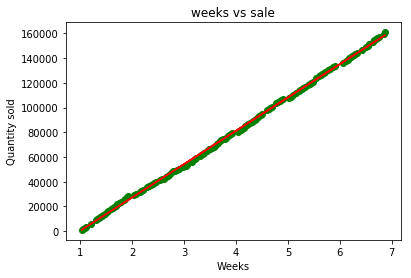

In [43]:
#visualization of train data
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train,lr.predict(x_train),color = 'Red')
plt.xlabel("Weeks")
plt.ylabel("Quantity sold")
plt.title("weeks vs sale")
plt.show()

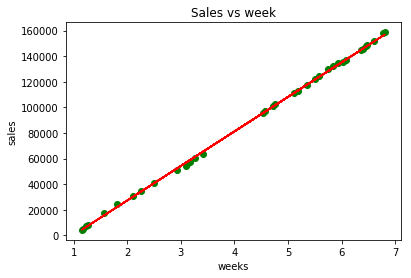

In [44]:
#visualization of train data
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_test,lr.predict(x_test),color = 'Red')
plt.xlabel("weeks")
plt.ylabel("sales")
plt.title("Sales vs week")
plt.show()

In [45]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


In [46]:
wml_credentials={
  "apikey": "PJCA8RbDM6tEhA2g7h919F3c0d--ZvefgvBz6FJmzsAc",
  "iam_apikey_description": "Auto-generated for key 7dd710af-9aa7-4af1-b9f0-30a2ed50b121",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/ef325d9f7f944700b76b379afb28e562::serviceid:ServiceId-8ee8da05-66bc-43e9-afdd-7fb648e1a364",
  "instance_id": "fa55173b-9ca1-468d-9965-33e0de7948e2",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [47]:
client = WatsonMachineLearningAPIClient(wml_credentials)


In [48]:
metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'startups data',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Hemant',
    client.repository.ModelMetaNames.NAME:"Multilinear",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22"
    
}

In [49]:
model_details=client.repository.store_model(lr,meta_props=metadata)

In [50]:
published_model_uid=client.repository.get_model_uid(model_details)


In [51]:
published_model_uid

'ddc0ed92-440e-4855-bec9-3eba608e0087'

In [52]:
created_deployment=client.deployments.create(published_model_uid,name="MLR")



#######################################################################################

Synchronous deployment creation for uid: 'ddc0ed92-440e-4855-bec9-3eba608e0087' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2efd8b07-61ed-412b-af22-ec7017f55393'
------------------------------------------------------------------------------------------------




In [53]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/fa55173b-9ca1-468d-9965-33e0de7948e2/deployments/2efd8b07-61ed-412b-af22-ec7017f55393/online'

In [54]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
2efd8b07-61ed-412b-af22-ec7017f55393  MLR   online  DEPLOY_SUCCESS  2020-07-19T13:40:24.375Z  scikit-learn-0.20  model
fb5a633d-7008-4b24-a406-b1f7e1e45d23  MLR   online  DEPLOY_SUCCESS  2020-07-19T13:20:57.722Z  scikit-learn-0.20  model
6ef0231f-c53a-403c-8980-bfe5d5e1bc4c  MLR   online  DEPLOY_SUCCESS  2020-07-19T07:14:14.184Z  scikit-learn-0.20  model
42903de7-82f8-43cd-807b-30f8f9059317  MLR   online  DEPLOY_SUCCESS  2020-07-19T05:39:06.450Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
